In [2]:
source("/home/user/data2/lit/bin/lit_utils.R")
source("/home/user/data3/lit/project/sORFs/sORFs.utils.R")
lib_text()
lib_plot()

# 长度分布比较

In [3]:
fread_c("../processed//reads_length_distribution.clean.txt") -> df

In [4]:
colnames(df) <- c("Sample","Length","Reads")

In [7]:
df$Sample <- factor(df$Sample,levels = c("p21_0321","p21_40_0422","p21_0523_1","p21_0523_5"))

In [17]:
ggplot(df, aes(x = Length, y = Reads)) +
  geom_col(alpha = 0.5,fill="steelblue") +                     # 柱状图
  geom_line(size = 0.7) +                     # 叠加折线
  geom_point(size = 1.6) +                    # 折线上的点
  facet_wrap(~ Sample, scales = "free_y", ncol = 1) +  # 四图一列
  scale_x_continuous(breaks = 25:34, limits = c(25, 34)) +
  theme_bw() +
  labs(x = "Length", y = "Reads count")+
theme_3()->p

In [18]:
ggsave(p,filename="../figures/sample_len_distribution.pdf")

Saving 6.67 x 6.67 in image
Warning message:
“Removed 8 rows containing missing values or values outside the scale range
(`geom_col()`).”


# 历史Ribo-seq实验三碱基周期性比较

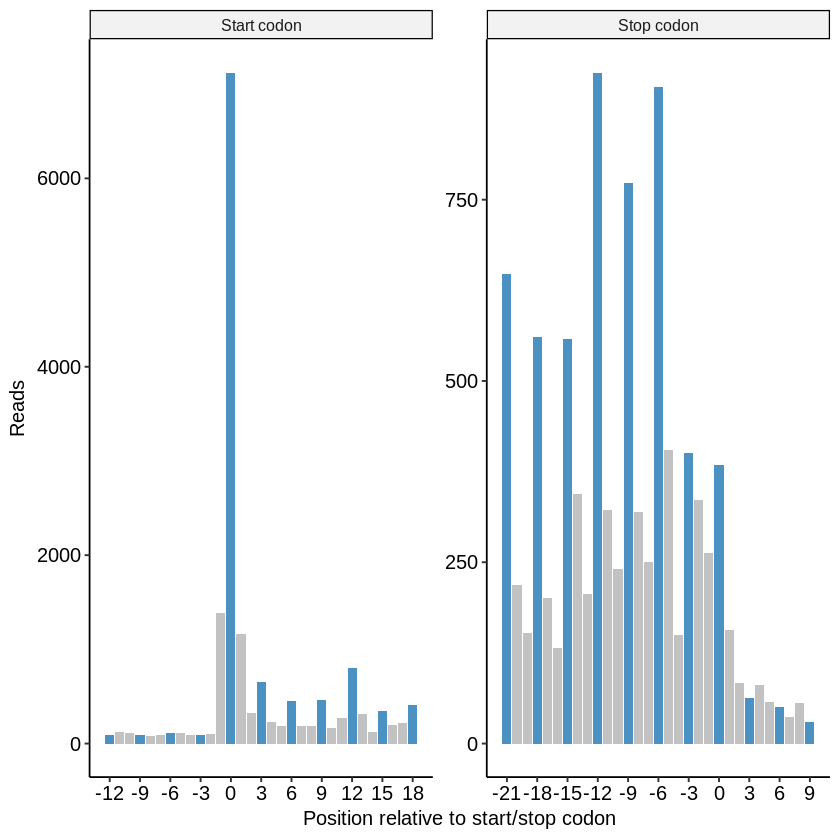

In [55]:
# ---- 1) 读入数据（首列为样本名，其余列为相对位点）----
start_file <- "/home/user/data3/lit/project/sORFs/_deprecated_output/Test-20250408/01-output/stat/ribotish/p21_0321.raw.RPF_start_distr_file.txt"  # 起始密码子附近数据
stop_file  <- "/home/user/data3/lit/project/sORFs/_deprecated_output/Test-20250408/01-output/stat/ribotish/p21_0321.raw.RPF_stop_distr_file.txt"   # 终止密码子附近数据

df_start <- fread(start_file,header=T,data.table = F)

df_stop  <-fread(stop_file,header=T,data.table = F)
# ---- 2) 宽转长，并筛选区间 ----
to_long <- function(df, region_label, pos_range) {
  df %>%
    pivot_longer(
      cols = -1,               # 除首列样本名外的所有列
      names_to = "Position",
      values_to = "Reads"
    ) %>%
    mutate(
      Sample   = .[[1]],
      Position = as.integer(Position),       # 列名（-40..19）转整数
      Region   = region_label
    ) %>%
    select(Sample, Region, Position, Reads) %>%
    filter(Position >= min(pos_range), Position <= max(pos_range))
}

start_long <- to_long(df_start, "Start codon", -12:18)
stop_long  <- to_long(df_stop,  "Stop codon",  -21:9)
ggplot(plot_df, aes(x = Position, y = Reads)) +
  geom_col(aes(fill = Highlight), alpha = 0.8) +
  facet_wrap(~ Region, ncol = 2, scales = "free") +
  scale_fill_manual(values = c("×3" = "#1f77b4", "Other" = "grey70")) +
  guides(fill = "none") +
  labs(x = "Position relative to start/stop codon", y = "Reads") +
  scale_x_continuous(
    breaks = function(x) seq(floor(min(x))-1, ceiling(max(x))+1, by = 3)
  ) +
  theme_3() +
  theme(legend.title = element_blank())

In [70]:
plot_rpf <- function(start_file,
                     stop_file) {
# ---- 1) 读入数据（首列为样本名，其余列为相对位点）----
df_start <- fread(start_file,header=T,data.table = F)
df_stop  <-fread(stop_file,header=T,data.table = F)
# ---- 2) 宽转长，并筛选区间 ----
to_long <- function(df, region_label, pos_range) {
  df %>%
    pivot_longer(
      cols = -1,               # 除首列样本名外的所有列
      names_to = "Position",
      values_to = "Reads"
    ) %>%
    mutate(
      Sample   = .[[1]],
      Position = as.integer(Position),       # 列名（-40..19）转整数
      Region   = region_label
    ) %>%
    select(Sample, Region, Position, Reads) %>%
    filter(Position >= min(pos_range), Position <= max(pos_range))
}

start_long <- to_long(df_start, "Start codon", -12:18)
stop_long  <- to_long(df_stop,  "Stop codon",  -21:9)
# ---- 3) 标记需要高亮的位点：3的倍数----
plot_df <- bind_rows(start_long, stop_long) %>%
   mutate(Highlight = ifelse(Position %% 3 == 0, "×3", "Other")) %>%
  arrange(Region, Position)
# ---- 4) 作图：柱；两面板（起始/终止），横排 ----
ggplot(plot_df, aes(x = Position, y = Reads)) +
  geom_col(aes(fill = Highlight), alpha = 0.8) +
  facet_wrap(~ Region, ncol = 2, scales = "free") +
  scale_fill_manual(values = c("×3" = "#1f77b4", "Other" = "grey70")) +
  guides(fill = "none") +
  labs(x = "Position relative to start/stop codon", y = "Reads") +
  scale_x_continuous(
    breaks = function(x) seq(floor(min(x))-1, ceiling(max(x))+1, by = 3)
  ) +
  theme_3() +
  theme(legend.title = element_blank())->p
    return(p)}

In [58]:
p21_0321_files <- c("/home/user/data3/lit/project/sORFs/_deprecated_output/Test-20250408/01-output/stat/ribotish/p21_0321.raw.RPF_start_distr_file.txt" ,
  "/home/user/data3/lit/project/sORFs/_deprecated_output/Test-20250408/01-output/stat/ribotish/p21_0321.raw.RPF_stop_distr_file.txt")

In [60]:
p21_40_0422_files <- c("/home/user/data3/lit/project/sORFs/_deprecated_output/Test-20250509/01-output/stat/ribotish/p21_40_0422.RPF_start_distr_file.txt" ,
  "/home/user/data3/lit/project/sORFs/_deprecated_output/Test-20250509/01-output/stat/ribotish/p21_40_0422.RPF_stop_distr_file.txt")

In [62]:
p21_0523_1_files <- c("/home/user/data3/lit/project/sORFs/_deprecated_output/Test-20250606/01-output/stat/ribotish/p21_0523_1.RPF_start_distr_file.txt" ,
  "/home/user/data3/lit/project/sORFs/_deprecated_output/Test-20250606/01-output/stat/ribotish/p21_0523_1.RPF_stop_distr_file.txt")

In [66]:
p21_0523_5_files <- c("/home/user/data3/lit/project/sORFs/_deprecated_output/Test-20250606/01-output/stat/ribotish/p21_0523_5.RPF_start_distr_file.txt",
"/home/user/data3/lit/project/sORFs/_deprecated_output/Test-20250606/01-output/stat/ribotish/p21_0523_5.RPF_stop_distr_file.txt")

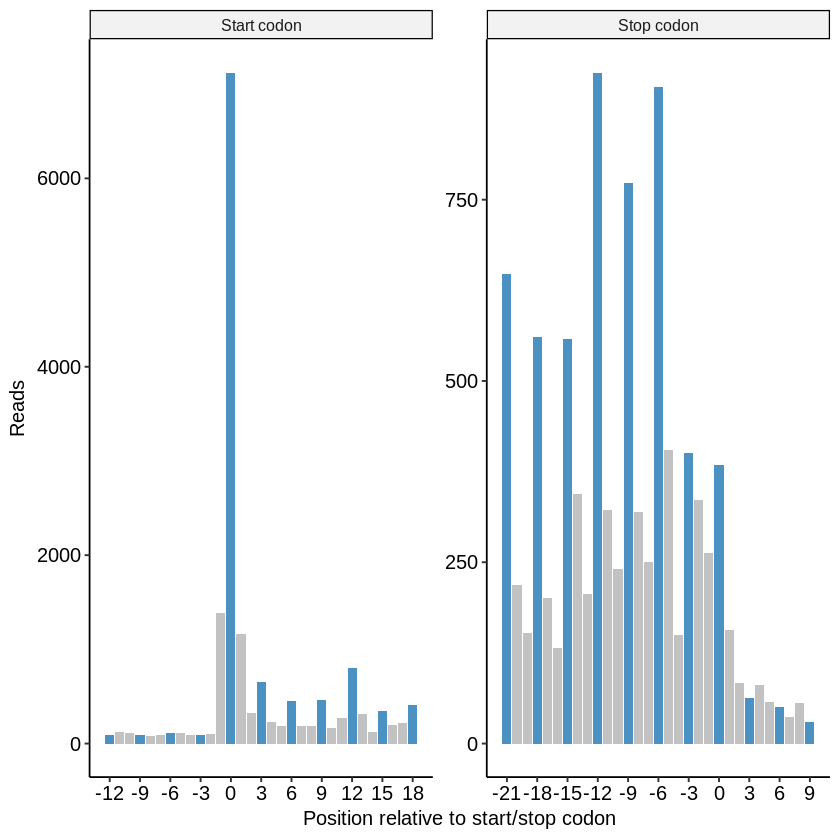

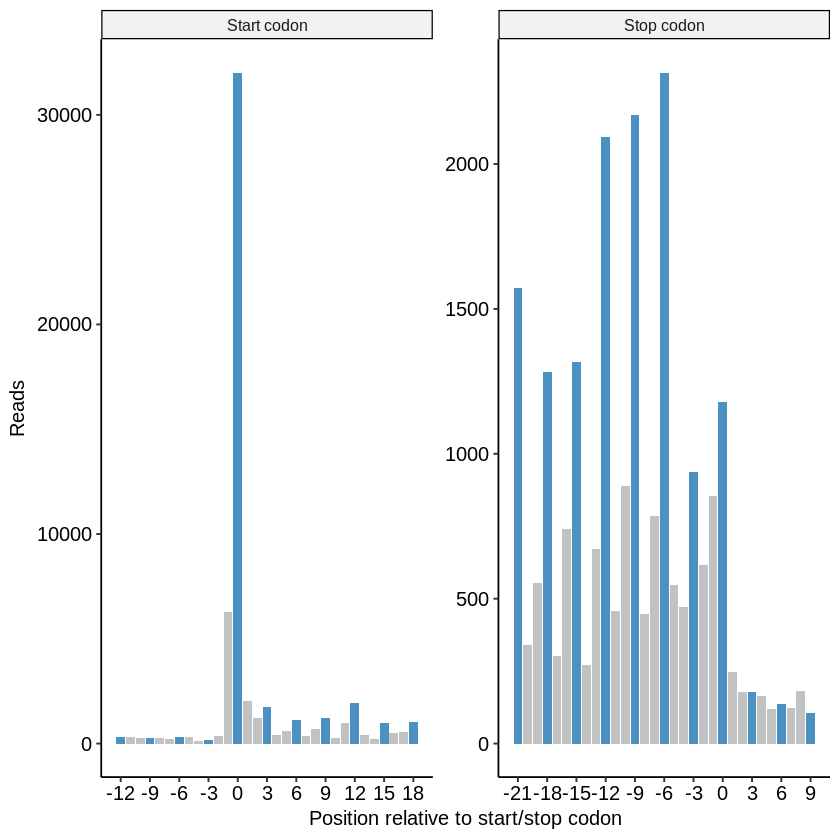

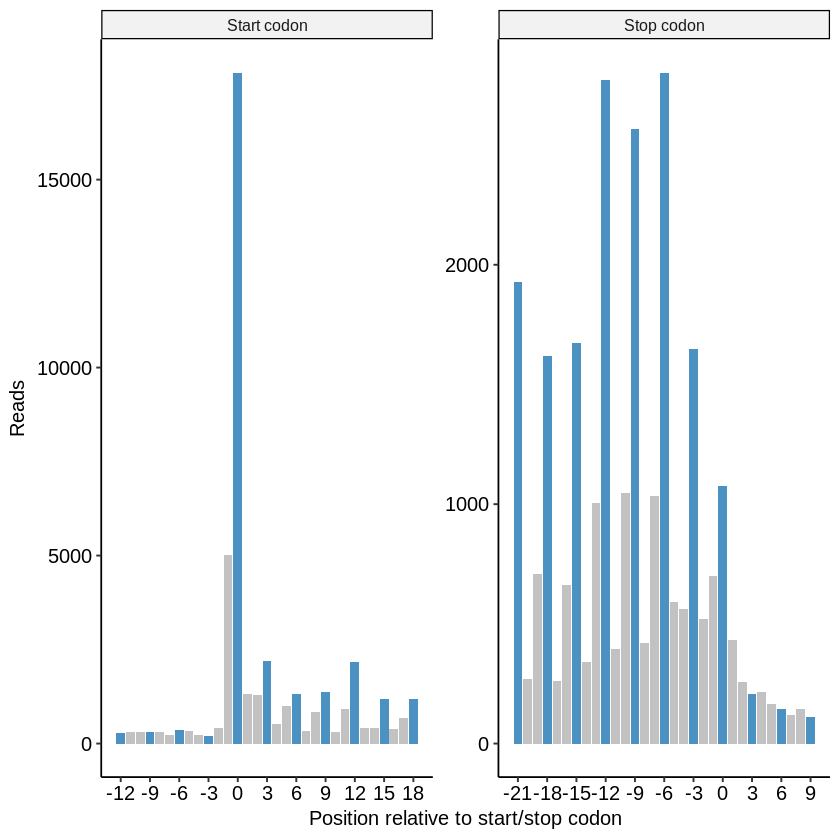

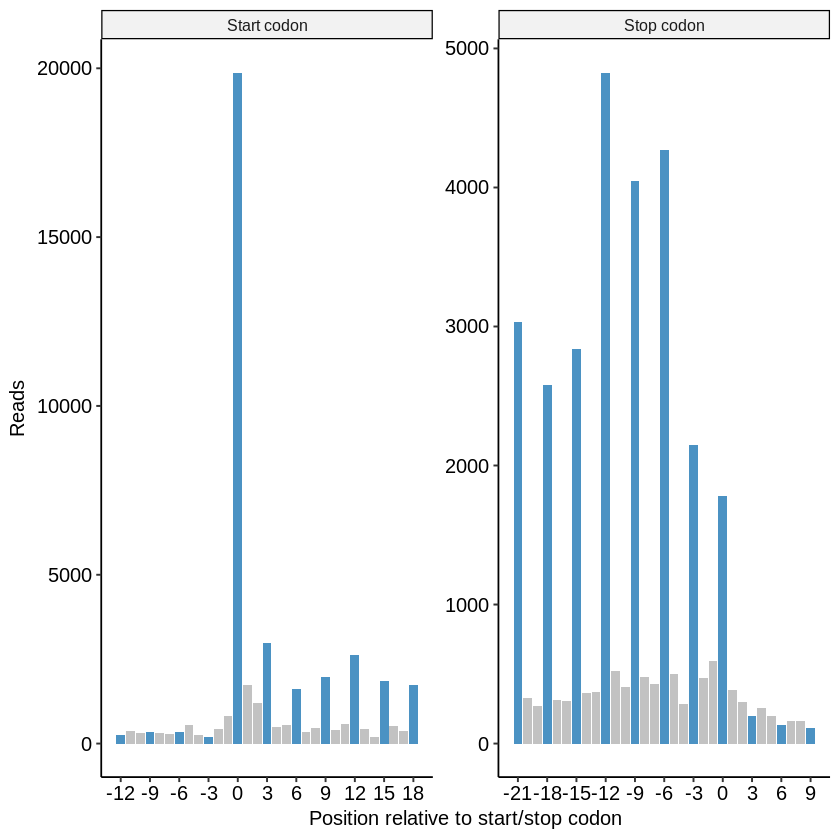

In [73]:
# plot_rpf(p21_0321_files[1],p21_0321_files[2])
# plot_rpf(p21_40_0422_files[1],p21_40_0422_files[2])
# plot_rpf(p21_0523_1_files[1],p21_0523_1_files[2])
# plot_rpf(p21_0523_5_files[1],p21_0523_5_files[2])

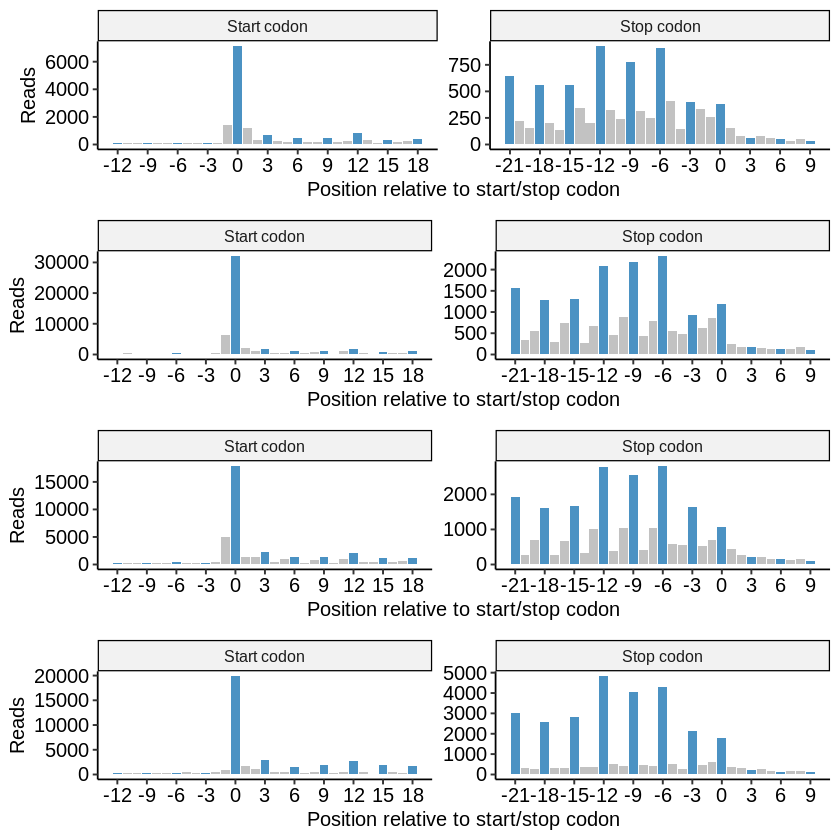

In [80]:
library(cowplot)

p1 <- plot_rpf(p21_0321_files[1], p21_0321_files[2])
p2 <- plot_rpf(p21_40_0422_files[1], p21_40_0422_files[2])
p3 <- plot_rpf(p21_0523_1_files[1], p21_0523_1_files[2])
p4 <- plot_rpf(p21_0523_5_files[1], p21_0523_5_files[2])

# 4行1列拼图（对齐y轴、关闭标签）
final_plot <- cowplot::plot_grid(
  p1, p2, p3, p4,
  ncol = 1, align = "v", axis = "lr", labels = NULL, rel_heights = c(1,1,1,1)
)
final_plot
ggsave("../figures/all_samples_RPF.pdf", final_plot, width = 12, height = 10, dpi = 300)

# 和其他研究比较三碱基周期性

In [3]:
fread_c("../processed/ribotish.frame_distr_with_peroidicity.tsv") -> pub_peri
fread_c("../processed/stat.all.txt") -> in_house_peri

In [4]:
select(pub_peri,study,periodicity) -> df_1
colnames(df_1) <- c("Study","Periodicity")
in_house_peri$Study <- "In house"
select(in_house_peri,Study,Periodicity)-> df_2
rbind(df_1,df_2) -> df

In [5]:
head(df)

,Study,Periodicity
,<chr>,<dbl>
1,AimeiDai_2017_JVirol,0.5223859
2,AimeiDai_2017_JVirol,0.5612630
3,AimeiDai_2017_JVirol,0.5180930
4,Battle_2015_Science,0.5588433
5,Battle_2015_Science,0.5833612
6,Battle_2015_Science,0.6564547


In [6]:
n_distinct(df$Study)

[1] 67

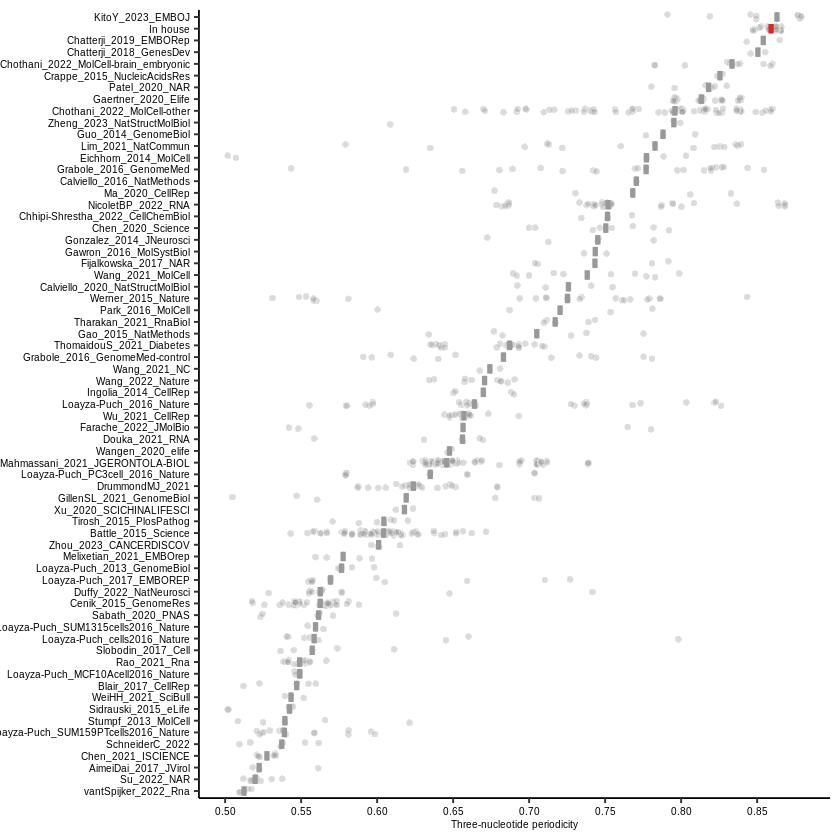

In [27]:
target <- "In house"

# 1) 按中位数排序
stat_order <- df %>%
  group_by(Study) %>%
  summarise(med = median(Periodicity, na.rm = TRUE), .groups = "drop") %>%
  arrange(med) %>%
  pull(Study)

# 2) 点也打上颜色标记（target 红，其余为 Others）
df_points <- df %>%
  mutate(
    Study = factor(Study, levels = stat_order),
    color_flag = if_else(Study == target, target, "Others")
  )

# 3) 计算中位数并标记 in house
df_med <- df_points %>%
  group_by(Study) %>%
  summarise(med = median(Periodicity, na.rm = TRUE), .groups = "drop") %>%
  mutate(color_flag = if_else(Study == target, target, "Others"))


# 3) 横轴最小值
min_val <- min(df_points$Periodicity, na.rm = TRUE)
max_val <- max(df_points$Periodicity, na.rm = TRUE)
# 4) 绘图
ggplot() +
  # 背景灰色散点
  geom_point(
    data = df_points,
    aes(x = Study, y = Periodicity),
    position = position_jitter(width = 0.2, height = 0, seed = 1),
      color="transparent",fill="grey60",
alpha = 0.35, size = 1.6, shape = 21
  ) +
  # 中位数短竖线（target红色，其他黑色）
  geom_crossbar(
    data = df_med,
    aes(x = Study, y = med, ymin = med, ymax = med, color = color_flag),
    width = 0.8, fill = NA, linewidth = 0.6
  ) +
scale_color_manual(
  values = setNames(c("grey60", "#d62728"), c("Others", target))
)+
  coord_flip() +
  scale_y_continuous(
    limits = c(min_val, max_val),
    breaks = seq(floor(min_val * 10) / 10, 1, 0.05)
  ) +
  labs(x = NULL, y = "Three-nucleotide periodicity", color = NULL) +
theme_3()+
theme(text = element_text(size = 6),legend.position = "none")->p
p

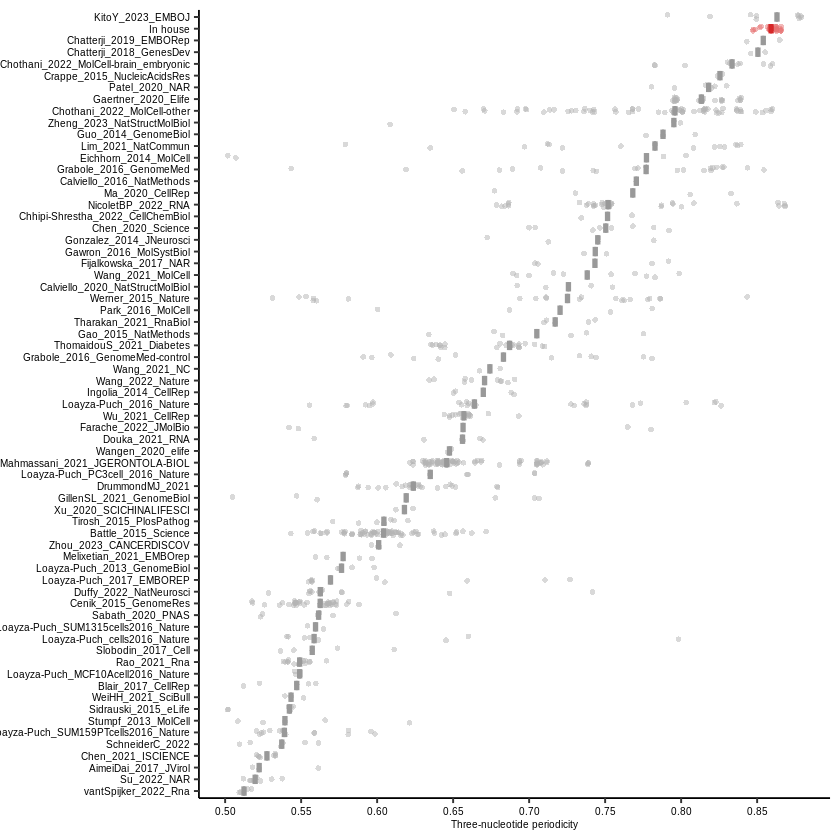

In [48]:
target <- "In house"

# 1) 按中位数排序
stat_order <- df %>%
  group_by(Study) %>%
  summarise(med = median(Periodicity, na.rm = TRUE), .groups = "drop") %>%
  arrange(med) %>%
  pull(Study)

# 2) 点也打上颜色标记（target 红，其余为 Others）
df_points <- df %>%
  mutate(
    Study = factor(Study, levels = stat_order),
    color_flag = if_else(Study == target, target, "Others")
  )

# 3) 计算中位数并标记 in house
df_med <- df_points %>%
  group_by(Study) %>%
  summarise(med = median(Periodicity, na.rm = TRUE), .groups = "drop") %>%
  mutate(color_flag = if_else(Study == target, target, "Others"))


# 3) 横轴最小值
min_val <- min(df_points$Periodicity, na.rm = TRUE)
max_val <- max(df_points$Periodicity, na.rm = TRUE)
# 4) 绘图
ggplot() +
  # 背景点
  geom_point(
    data = df_points,
    aes(
      x = Study, y = Periodicity,
      fill = color_flag
    ),
    position = position_jitter(width = 0.2, height = 0, seed = 1),
    color = "transparent",
    alpha = 0.5, size = 1.6, shape = 21,stroke=0
  ) +
  # 中位数短竖线
  geom_crossbar(
    data = df_med,
    aes(x = Study, y = med, ymin = med, ymax = med, color = color_flag),
    width = 0.8, fill = NA, linewidth = 0.6
  ) +
  scale_fill_manual(
    values = setNames(c("grey70", "#e57373"), c("Others", target))
  ) +
  scale_color_manual(
    values = setNames(c("grey60", "#d62728"), c("Others", target))
  ) +
  coord_flip() +
  scale_y_continuous(
    limits = c(min_val, max_val),
    breaks = seq(floor(min_val * 10) / 10, 1, 0.05)
  ) +
  labs(x = NULL, y = "Three-nucleotide periodicity", color = NULL, fill = NULL) +
  theme_3() +
  theme(text = element_text(size = 6), legend.position = "none") -> p
p

In [49]:
ggsave(p,filename = "../figures/peri_compare.pdf", width = 8, height = 8, dpi = 300)

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Loayza‐Puch_2017_EMBOREP' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Loayza‐Puch_2017_EMBOREP' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Loayza‐Puch_2017_EMBOREP' in 'mbcsToSbcs': dot substituted for <90>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Loayza‐Puch_2017_EMBOREP' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Loayza‐Puch_2017_EMBOREP' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Loayza‐Puc

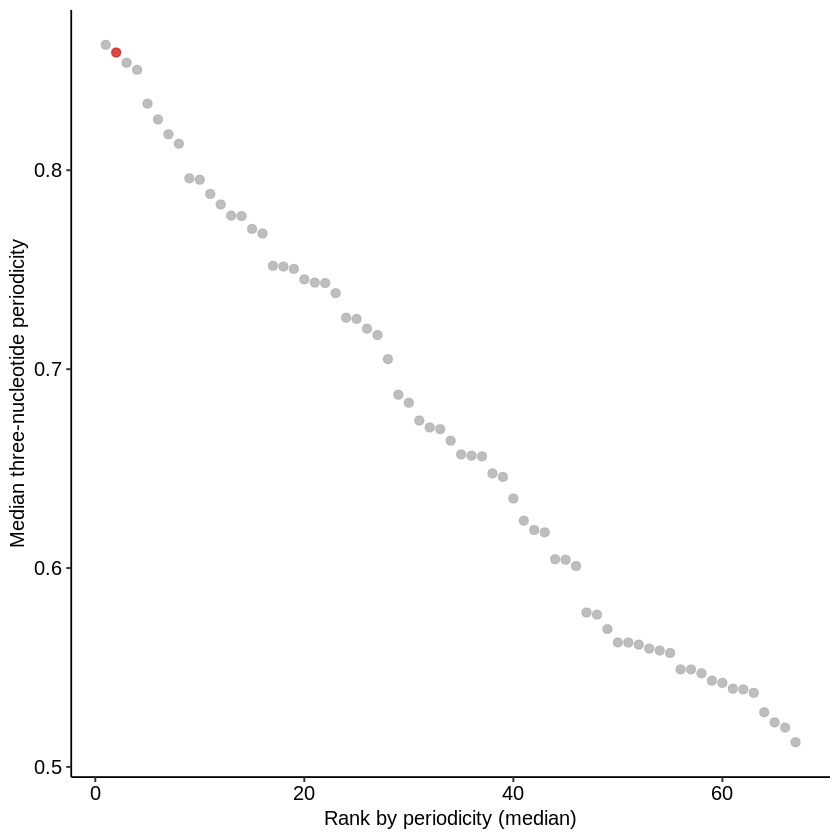

In [57]:
library(dplyr)
library(ggplot2)

target <- "In house"

# 1) 计算各Study的中位周期性
df_med <- df %>%
  group_by(Study) %>%
  summarise(med = median(Periodicity, na.rm = TRUE), .groups = "drop") %>%
  arrange(desc(med)) %>%                         # 从高到低排
  mutate(
    rank = row_number(),                         # 排名（1 = 周期性最高）
    color_flag = if_else(Study == target, target, "Others")
  )

# 2) 作图：x 为排名，y 为中位周期性；标记 In house 为红色，其余灰
ggplot(df_med, aes(x = rank, y = med)) +
  geom_point(
    aes(color = color_flag),
    shape = 19, size = 2.2, alpha = 0.85  ) +
  scale_color_manual(
    values = setNames(c("grey70", "#d62728"), c("Others", target))
  ) +
  labs(x = "Rank by periodicity (median)",
       y = "Median three-nucleotide periodicity",
       fill = NULL) +
  theme_3() +
  theme(legend.position = "none")


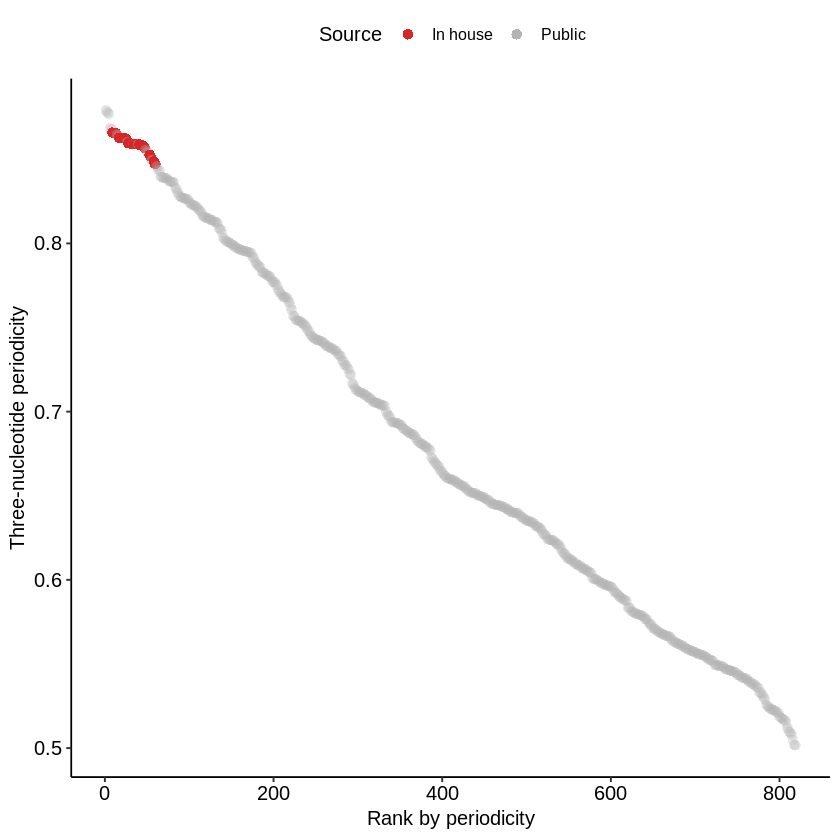

In [85]:
library(dplyr)
library(ggplot2)

target <- "In house"

# 1) 清洗 + 排序 + 标记
df_rank <- df %>%
  mutate(
    Periodicity = suppressWarnings(as.numeric(Periodicity)),
    Study = as.character(Study)
  ) %>%
  filter(is.finite(Periodicity)) %>%
  arrange(desc(Periodicity)) %>%         # 从高到低；想低到高就改成 arrange(Periodicity)
  mutate(
    rank = row_number(),
    color_flag = if_else(Study == target, target, "Public")
  )

# 2) 作图
p <- ggplot(df_rank, aes(x = rank, y = Periodicity)) +
  geom_point(aes(color = color_flag, alpha = color_flag),
             shape = 16, size = 2.6) +
  scale_color_manual(values = setNames(c("grey70", "#d62728"), c("Public", target))) +
  scale_alpha_manual(values = setNames(c(0.2, 1.0), c("Public", target))) +
  guides(alpha = "none") +
  labs(x = "Rank by periodicity", y = "Three-nucleotide periodicity",
       color = "Source") +
  theme_3()
p

# 3) 正确保存（把 plot 显式传入）
ggsave(filename = "../figures/peri_compare_1.pdf", plot = p, width = 8, height = 8, dpi = 300)
